<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/Inference_for_DTMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inference for Discrete Time Markov Chains

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-mc-inference.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

In [3]:
#import data
#   - you can either clone the whole repository, go to resources and select the data from there
#   - or you can just go to the link below and download the data necessary and drop it in the runtime files

#https://github.com/NRJaggers/Applied-Stochastic-Processes/blob/main/Resources/preproglucacon.csv

!git clone https://github.com/NRJaggers/Applied-Stochastic-Processes/

Cloning into 'Applied-Stochastic-Processes'...
remote: Enumerating objects: 303, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 303 (delta 72), reused 28 (delta 10), pack-reused 118
Receiving objects: 100% (303/303), 1.66 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [74]:
import numpy as np
import pandas as pd

#dataset_path = 'preproglucacon.csv'
dataset_path = 'Applied-Stochastic-Processes/Resources/preproglucacon.csv'


# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
print(df.head())

   x
0  G
1  T
2  A
3  T
4  T


###1.

In [35]:
df.count()

x    1572
dtype: int64

In [155]:
subtotals = df.value_counts()

In [60]:
subtotals.sum()

1572

In [119]:
data = df.to_numpy()
data[-1]

array(['G'], dtype=object)

In [140]:
#create array to hold data
P = np.zeros((subtotals.size,subtotals.size))

def classify_value(value):
    if value == 'A':
        return 0
    elif value == 'C':
        return 1
    elif value == 'G':
        return 2
    elif value == 'T':
        return 3
    else:
        return 'Unknown'

#count transitions
for i in range(0,df.size-1):
  j = classify_value(data[i])
  k = classify_value(data[i+1])
  P[j,k] += 1

#show results
print(P)


[[185.  74.  86. 171.]
 [101.  41.   6. 115.]
 [ 69.  45.  34.  78.]
 [161. 103. 100. 202.]]


4

In [157]:
Pp = np.zeros((subtotals.size,subtotals.size))

for row in range(0,P.shape[0]):
  for col in range(0,P.shape[1]):
    Pp[row,col] = P[row,col]/P[row].sum()

In [156]:
pd.DataFrame(Pp, index=["A", "C", "G", "T"], columns=["A", "C", "G", "T"])

,A,C,G,T
A,0.358527,0.143411,0.166667,0.331395
C,0.384030,0.155894,0.022814,0.437262
G,0.305310,0.199115,0.150442,0.345133
T,0.284452,0.181979,0.176678,0.356890


###2.

###3.

In [158]:
def compute_stationary_distribution(P):
    s = P.shape[0]
    identity_matrix = np.eye(s)
    ones_matrix = np.ones((s, s))

    # Compute the stationary distribution
    stationary_distribution = np.dot(np.ones(s), np.linalg.solve(identity_matrix - P + ones_matrix, np.eye(s)))

    return stationary_distribution

pi = compute_stationary_distribution(Pp)
pi

array([0.32845321, 0.16740929, 0.14385742, 0.36028008])

###4.

In [166]:
pd.DataFrame(Pp, index=["A", "C", "G", "T"], columns=["A", "C", "G", "T"])

,A,C,G,T
A,0.358527,0.143411,0.166667,0.331395
C,0.384030,0.155894,0.022814,0.437262
G,0.305310,0.199115,0.150442,0.345133
T,0.284452,0.181979,0.176678,0.356890


In [164]:
Pp.mean(axis=0)

array([0.3330799 , 0.17009956, 0.12915032, 0.36767023])

means of the columns of the observed transition matrix seem to match up with the stationary distribution.

###5.

In [193]:
#create array to hold data
P3 = np.zeros((subtotals.size,subtotals.size,subtotals.size))

#count transitions
for i in range(0,df.size-2):
  past = classify_value(data[i])
  present = classify_value(data[i+1])
  future = classify_value(data[i+2])
  P3[present,past,future] += 1

#show results
print(P3)


[[[81. 22. 29. 53.]
  [30. 20. 15. 36.]
  [30.  3. 14. 22.]
  [44. 29. 28. 60.]]

 [[30.  7.  2. 35.]
  [15.  2.  1. 23.]
  [18. 10.  1. 16.]
  [38. 22.  2. 41.]]

 [[29. 18. 11. 27.]
  [ 2.  1.  0.  3.]
  [12.  5. 10.  7.]
  [26. 21. 13. 40.]]

 [[54. 23. 33. 61.]
  [28. 26. 20. 41.]
  [28. 11. 12. 27.]
  [51. 43. 35. 73.]]]


In [209]:
P3p = np.zeros((subtotals.size,subtotals.size,subtotals.size))

for sheet in range(0,P3.shape[0]):
  for row in range(0,P3.shape[1]):
    for col in range(0,P3.shape[2]):
      P3p[sheet,row,col] = P3[sheet,row,col]/P3[sheet,row].sum()

P3p

array([[[0.43783784, 0.11891892, 0.15675676, 0.28648649],
        [0.2970297 , 0.1980198 , 0.14851485, 0.35643564],
        [0.43478261, 0.04347826, 0.20289855, 0.31884058],
        [0.27329193, 0.18012422, 0.17391304, 0.37267081]],

       [[0.40540541, 0.09459459, 0.02702703, 0.47297297],
        [0.36585366, 0.04878049, 0.02439024, 0.56097561],
        [0.4       , 0.22222222, 0.02222222, 0.35555556],
        [0.36893204, 0.21359223, 0.01941748, 0.39805825]],

       [[0.34117647, 0.21176471, 0.12941176, 0.31764706],
        [0.33333333, 0.16666667, 0.        , 0.5       ],
        [0.35294118, 0.14705882, 0.29411765, 0.20588235],
        [0.26      , 0.21      , 0.13      , 0.4       ]],

       [[0.31578947, 0.13450292, 0.19298246, 0.35672515],
        [0.24347826, 0.22608696, 0.17391304, 0.35652174],
        [0.35897436, 0.14102564, 0.15384615, 0.34615385],
        [0.25247525, 0.21287129, 0.17326733, 0.36138614]]])

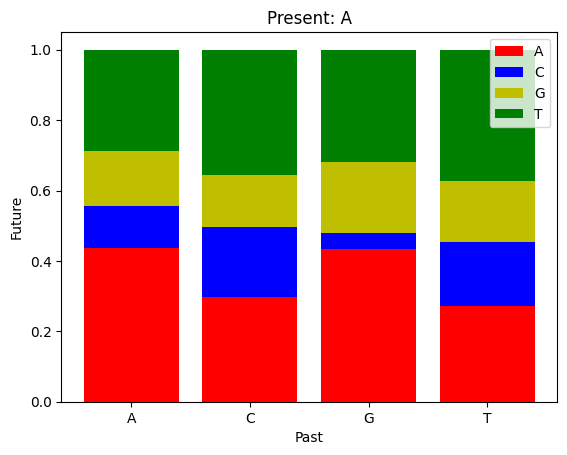

In [213]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ['A', 'C', 'G', 'T']
y1 = P3p[0,:,0]
y2 = P3p[0,:,1]
y3 = P3p[0,:,2]
y4 = P3p[0,:,3]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Past")
plt.ylabel("Future")
plt.legend(["A", "C", "G", "T"])
plt.title("Present: A")
plt.show()

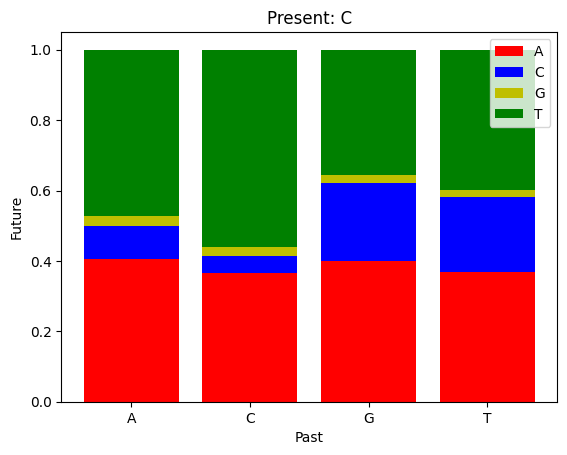

In [214]:
# create data
x = ['A', 'C', 'G', 'T']
y1 = P3p[1,:,0]
y2 = P3p[1,:,1]
y3 = P3p[1,:,2]
y4 = P3p[1,:,3]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Past")
plt.ylabel("Future")
plt.legend(["A", "C", "G", "T"])
plt.title("Present: C")
plt.show()

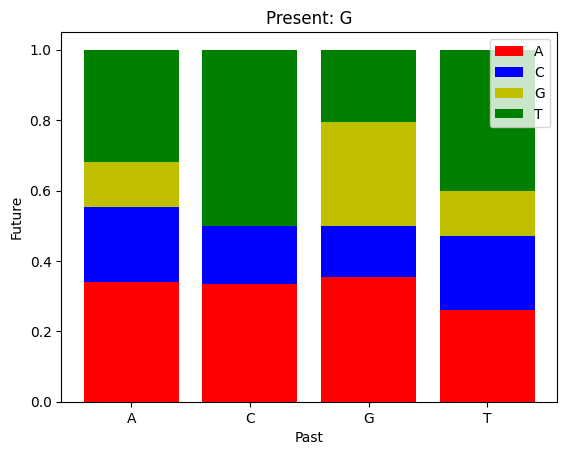

In [215]:
# create data
x = ['A', 'C', 'G', 'T']
y1 = P3p[2,:,0]
y2 = P3p[2,:,1]
y3 = P3p[2,:,2]
y4 = P3p[2,:,3]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Past")
plt.ylabel("Future")
plt.legend(["A", "C", "G", "T"])
plt.title("Present: G")
plt.show()

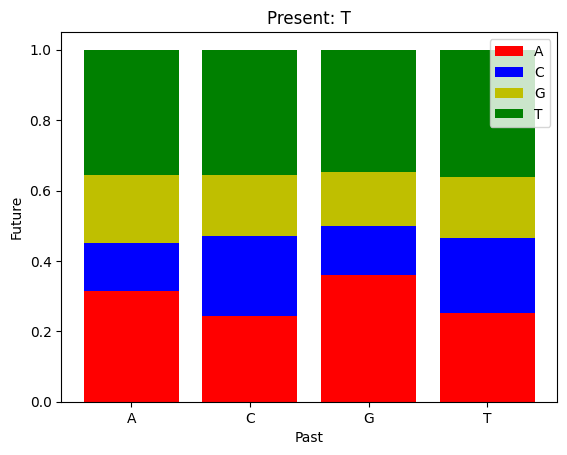

In [216]:
# create data
x = ['A', 'C', 'G', 'T']
y1 = P3p[3,:,0]
y2 = P3p[3,:,1]
y3 = P3p[3,:,2]
y4 = P3p[3,:,3]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Past")
plt.ylabel("Future")
plt.legend(["A", "C", "G", "T"])
plt.title("Present: T")
plt.show()

Based on these graphs, I would say this doesn't seem to be a candidate for a first order markov chain. Some of the plots are close in certain transitions but certainly not overall.

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.

I think the big concept from this homework is the process of determining if something is a markov chain and dealing with the data to create the transition matrix to start testing it. Most of the labor from this homework was deciding how to attack the problem from a coding perspective. I spent a hefty amount of time trying to manually find the transition matrix and create the plots. I did this because although there are python packages for markov chains online, I couldn't find and use one that seemed like it could get the job done correctly. I was also a little stubborn and didn't switch to R even though it seems like it would be an easier time based on the online examples from the class website (I also don't know R lol)